# Multi Linear Regression

## Boom Bike Sharing 

### Problem statement

BoomBikes, a US bike-sharing service hit by the pandemic, seeks a strategy post-lockdown. They aim to understand bike demand factors in the American market. The consulting firm will identify key variables affecting bike demand and assess their impact. Weather, seasons, time, holidays, economics, marketing, and infrastructure are pivotal. Analyzing these factors using statistical and ML models will predict future bike demands, aiding BoomBikes' revival plans.

The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
The steps we follow are:

 1. Reading, understanding and visualising the data 
 2. Preditng the variables for modeling
 3. Training the models 
 4. Residual analysis
 5. Prediction and evaluation on the test set
 
 

## Step 1: Reading, understanding and visualising the data

In [3]:
# import Numpy and Pandas and read the bike share data

import numpy as np
import pandas as pd

# import warning library to hide unnecessary warning
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# lets read the data
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# lets see its shape
day.shape

(730, 16)

In [6]:
# we have 730*16 cell in the csv file

730*16

11680

In [7]:
# lets see if we have any missing value

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Q. Do we have any missing value in day.csv file? - No

In [8]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# lets see the statical summary of all the numarical columns.

day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# check unique data

day.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [11]:
# check all columns

day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Observation of data we have

 - data to remove - 'instant', 'dteday', 'registered','casual' - they have no relevance data
 - numerical columns - 'temp', 'hum', 'windspeed', 'atemp', 'cnt'
 - catagorical columns - yr, 'holiday', 'workingday', 'weathersit', 'season', 'weekday', 'mnth'
 - data for converting dummies - 'weathersit', 'season', 'weekday', 'mnth'

In [12]:
# we can drop 'instant' and 'dteday'
newDay = day.drop(['instant', 'dteday', 'registered','casual'], axis=1)

newDay.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
# data for creating dummies - 'weathersit', 'season', 'weekday', 'mnth'
# need to map them

newDay['weathersit'] = newDay.weathersit.map({1: 'clear', 2: 'Mist',3:'Light Rain', 4:'Heavy Rain' })
newDay['season'] = newDay.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
newDay['weekday'] = newDay.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})
newDay['mnth'] = newDay.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

newDay.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
newDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [15]:
# lets import libary to visualising data
import matplotlib.pyplot as plt
import seaborn as sns

##### Univariate Analysis

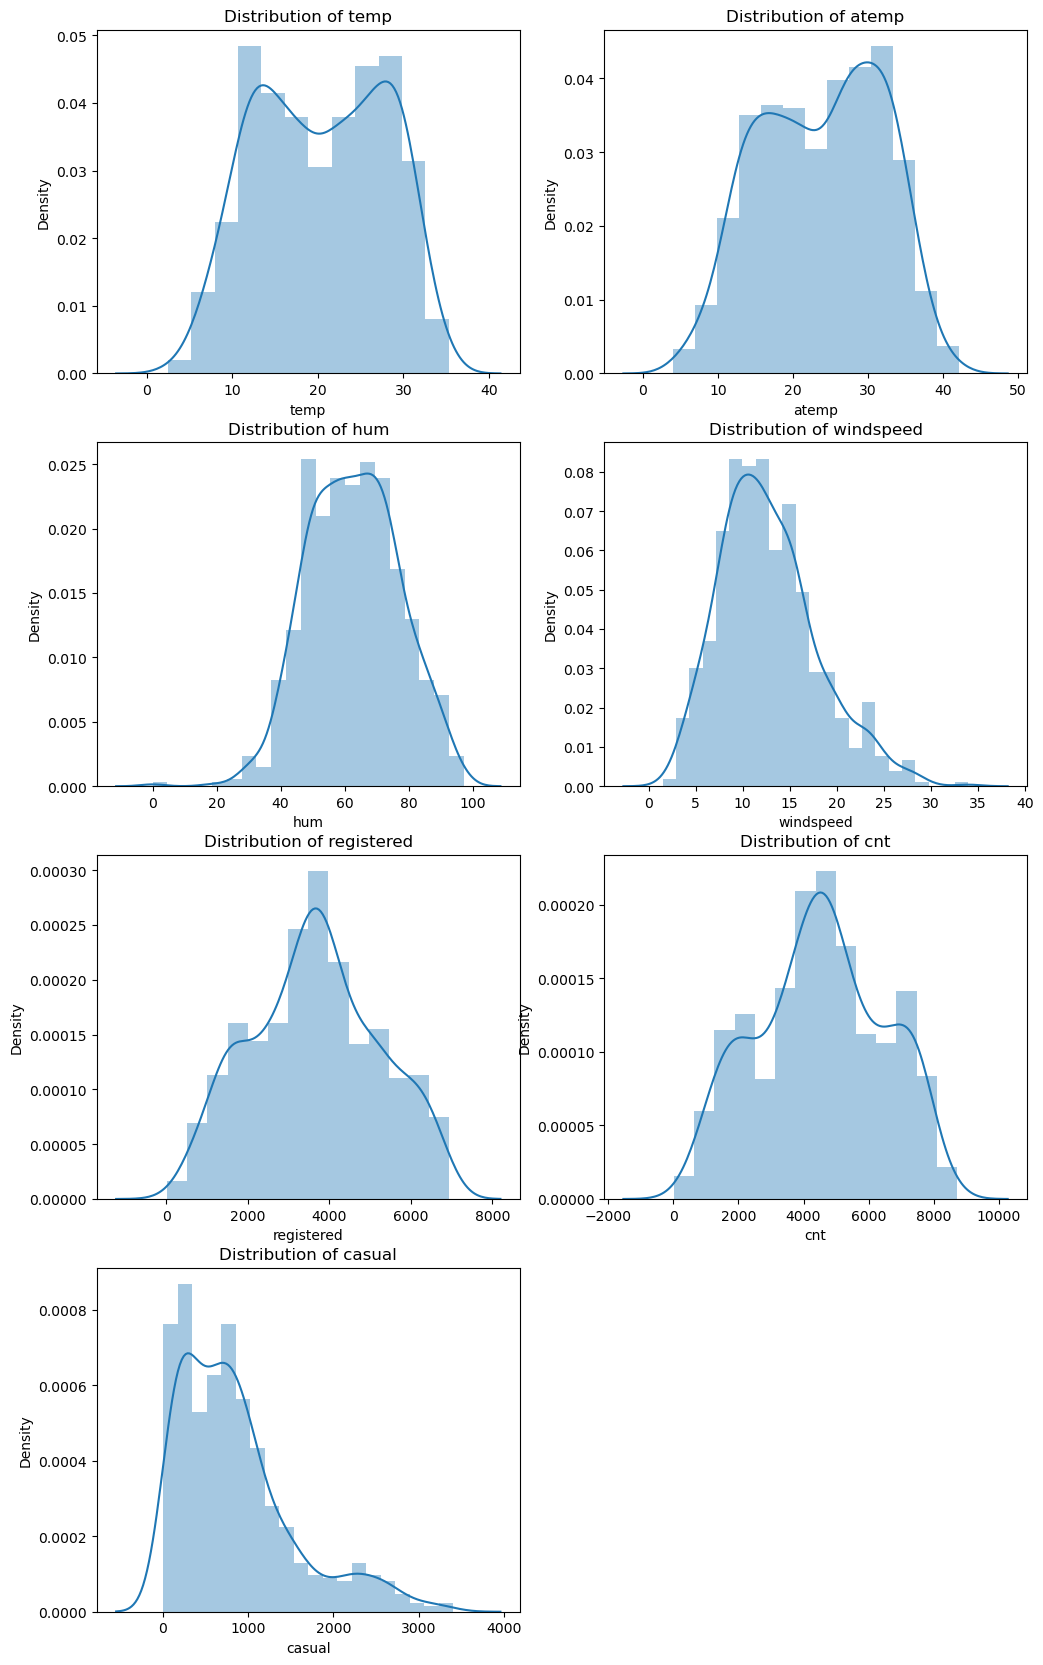

In [16]:
#checking outliers of continous variables by distribution plot
continous_vaiables = ['temp','atemp', 'hum', 'windspeed', 'registered', 'cnt', 'casual']
plt.figure(figsize=(12,18))
for i,v in enumerate(continous_vaiables):
    plt.subplot(4,2,i+1)
    sns.distplot(day[v])
    plt.title('Distribution of ' + v)
    plt.xlabel(v)
    plt.ylabel('Density')
    plt.subplots_adjust(bottom = 0.001)
plt.show()

##### Bivariate Analysis

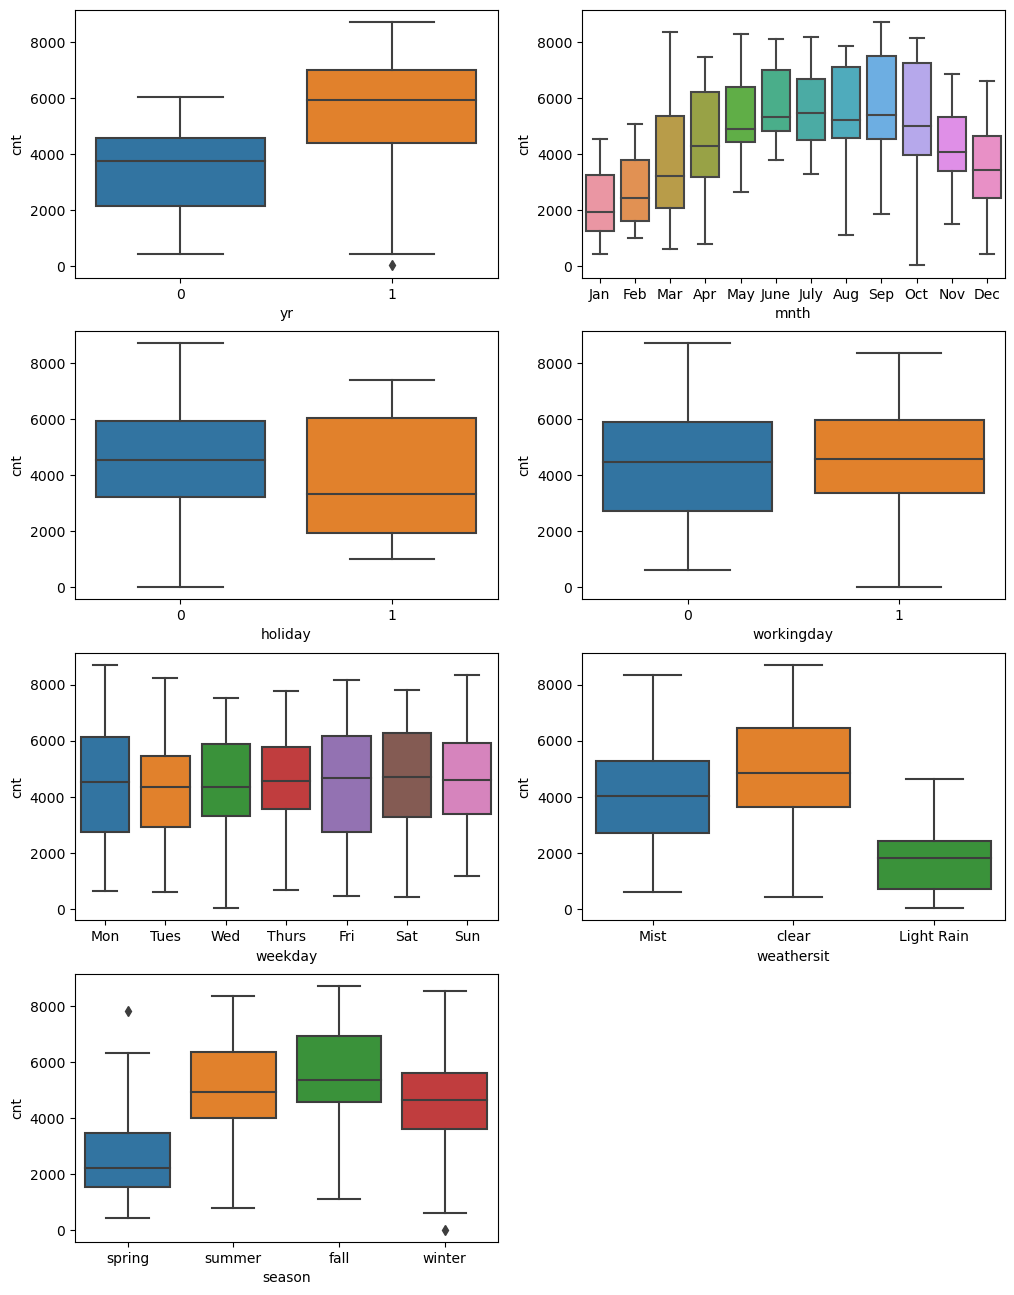

In [779]:
# catagorical variable and count relation.
# catagorical variable are - 'yr', holiday', 'workingday', 'weathersit', 'season', 'weekday', 'mnth'

plt.figure(figsize=(12,16))
plt.subplot(4,2,1)
sns.boxplot(x="yr", y="cnt", data = newDay)

plt.subplot(4,2,2)
sns.boxplot(x="mnth", y="cnt", data = newDay)

plt.subplot(4,2,3)
sns.boxplot(x="holiday", y="cnt", data = newDay)

plt.subplot(4,2,4)
sns.boxplot(x="workingday", y="cnt", data = newDay)

plt.subplot(4,2,5)
sns.boxplot(x="weekday", y="cnt", data = newDay)

plt.subplot(4,2,6)
sns.boxplot(x="weathersit", y="cnt", data = newDay)

plt.subplot(4,2,7)
sns.boxplot(x="season", y="cnt", data = newDay)

plt.show()

##### Multivariate Analysis

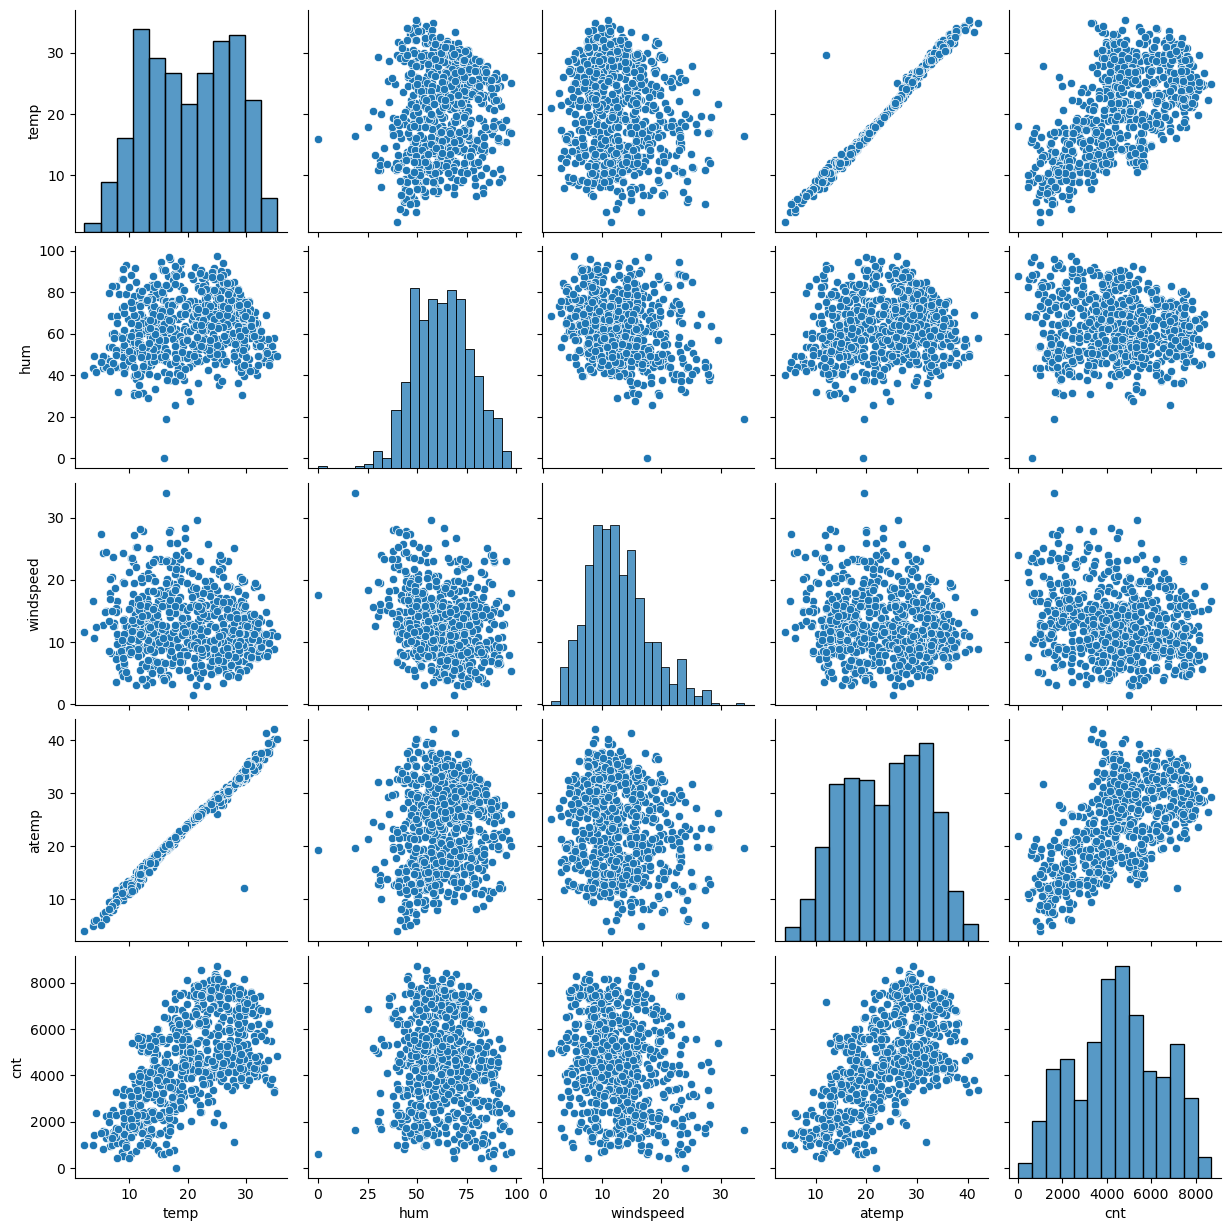

In [778]:
# plot numeric data
sns.pairplot(newDay, vars=['temp', 'hum', 'windspeed', 'atemp', 'cnt'])
plt.show()

some variables signs positive - temp an atemp seems more co-related with cnt.

####  We can see clear relation between catagorical variables and cnt- tagret variable
Bike sharing increases
 - in 2019 then 2018
 - between June to September month
 - on holidays
 - when wheather is clear
 - in fall season
 
Not seen much difference
 - on working days and week days

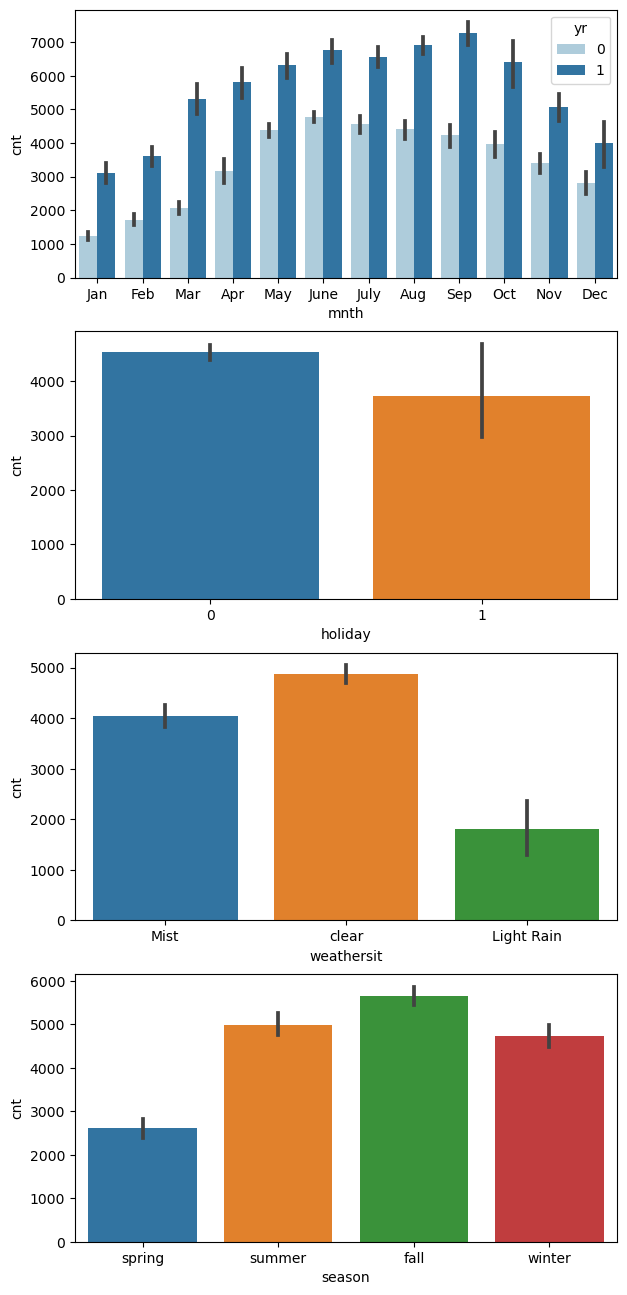

In [780]:
# univariate analysis of catagorical variables

plt.figure(figsize=(7,16))

plt.subplot(4,1,1)
sns.barplot(x="mnth", y="cnt", data = newDay, palette='Paired', hue='yr')

plt.subplot(4,1,2)
sns.barplot(x="holiday", y="cnt", data = newDay)

plt.subplot(4,1,3)
sns.barplot(x="weathersit", y="cnt", data = newDay)

plt.subplot(4,1,4)
sns.barplot(x="season", y="cnt", data = newDay)

plt.show()

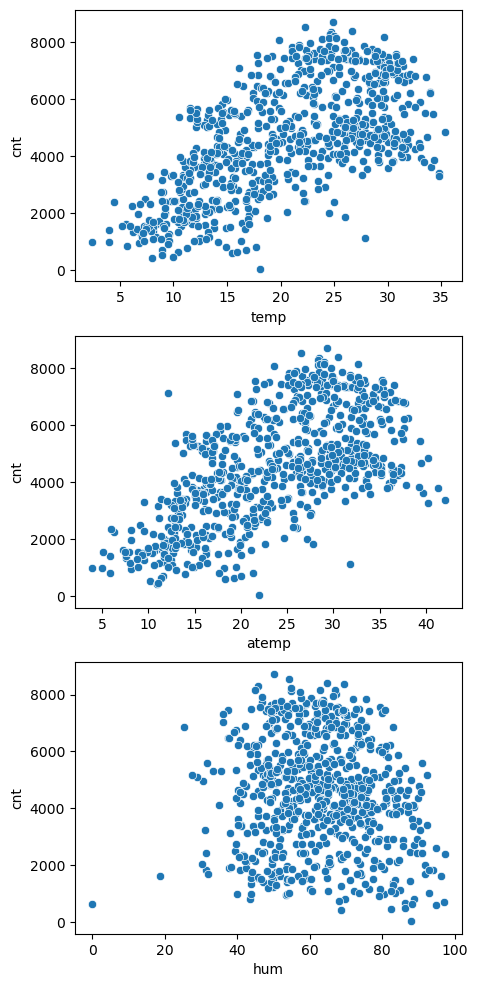

In [781]:
# Univariate analysis of numeric analysis

plt.figure(figsize=(5,12))

plt.subplot(3,1,1)
sns.scatterplot(x='temp',y='cnt' ,data=newDay)

plt.subplot(3,1,2)
sns.scatterplot(x='atemp',y='cnt' ,data=newDay)

plt.subplot(3,1,3)
sns.scatterplot(x='hum',y='cnt' ,data=newDay)

plt.show()

### preparing data for Modeling

 - converting binary vars to 0/1
 - other catagorical vars to dummy vars and then converting to 0/1

- splitting into train and test 
- rescalling of variables

In [782]:
# data for converting dummies - 'weathersit', 'season', 'weekday', 'mnth'

weathersit=pd.get_dummies(newDay.weathersit, drop_first=True) #Dropping the first dummy variable
season=pd.get_dummies(newDay.season, drop_first=True) #Dropping the first dummy variable
weekday=pd.get_dummies(newDay.weekday, drop_first=True) #Dropping the first dummy variable
mnth=pd.get_dummies(newDay.mnth, drop_first=True) #Dropping the first dummy variable

newDay=pd.concat([newDay,weathersit], axis=1)
newDay=pd.concat([newDay,season], axis=1)
newDay=pd.concat([newDay,weekday], axis=1)
newDay=pd.concat([newDay,mnth], axis=1)
pd.set_option('display.max_columns', 500)
newDay.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,spring,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [783]:
# now drop the master of dummies
newDay.drop(columns=['weathersit','season','weekday','mnth'], inplace=True)
newDay.shape

(730, 30)

In [784]:
newDay.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [785]:
# converting yes/no to 1/0 , 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'

varlist = ['spring', 'clear', 'winter', 'summer', 'Mist', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep']


for col in varlist:
    newDay[col] = newDay[col].map({True: 1, False: 0})
    
newDay.head(20)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


#### now import scikit-learn library to train and test

In [786]:
# scikit-learn
import sklearn
from sklearn.model_selection import train_test_split

newDay_train, newDay_test = train_test_split(newDay, train_size=.7, random_state=100)

print(newDay_train.shape)
print(newDay_test.shape)

(510, 30)
(220, 30)


In [787]:
# we shall use min-max scaling technique to normalize data.
# lets import min-max module frm sciket-learn

from sklearn.preprocessing import MinMaxScaler

# we need to scale only columns having numaric variables as catagorical variable is already mapped in 0 and 1.
# lets instantiate an object first

scaler = MinMaxScaler()

numVars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# fit on data
newDay_train[numVars] = scaler.fit_transform(newDay_train[numVars])

newDay_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Training the Modal

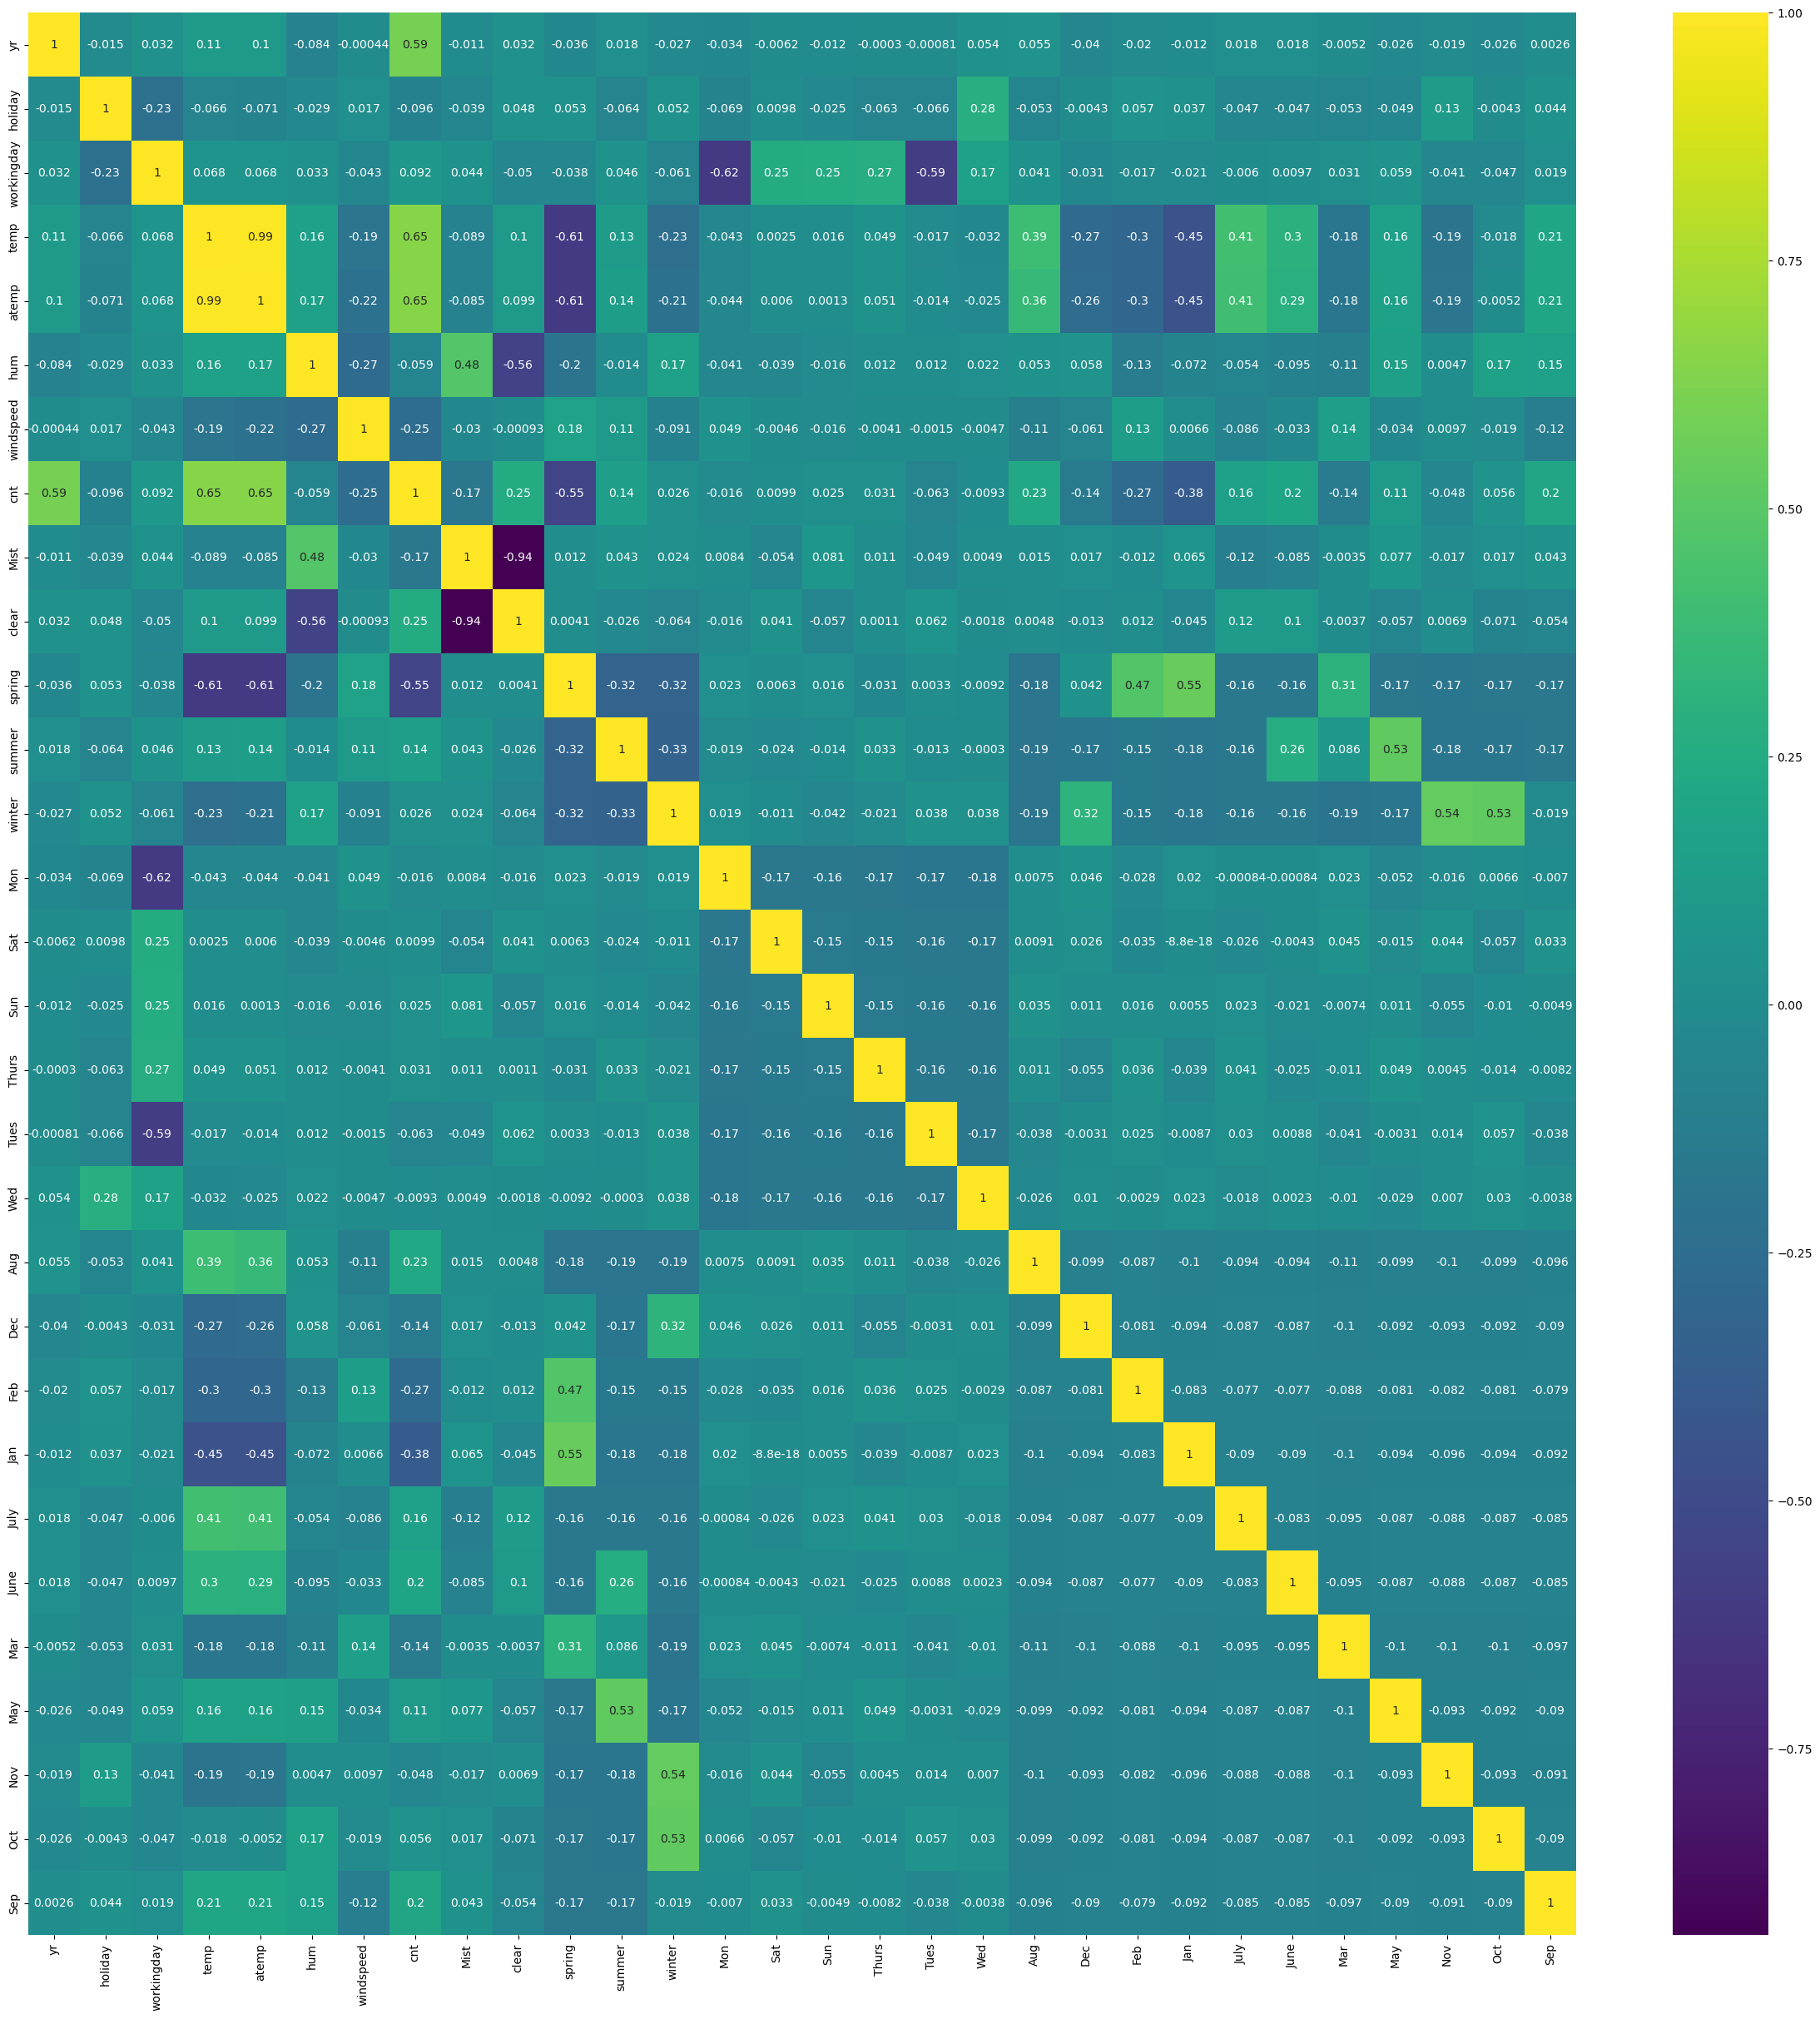

In [788]:
#Visualizing corelations among the variables using a heatmap

plt.figure(figsize=(30, 30))
sns.heatmap(newDay_train.corr(),annot=True,cmap='viridis')
plt.show()

In [789]:
newDay_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [790]:
# X_train, y_train

y_train = newDay_train.pop("cnt")
X_train = newDay_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [791]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [792]:
# import statsmodels api

import statsmodels.api as sm

In [793]:
# add a constant - lets start with most co-related variable -temp
X_train_sm = sm.add_constant(X_train['temp'])

#create first model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.params


const    0.169031
temp     0.640944
dtype: float64

In [794]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.46e-61
Time:                        23:56:45   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [795]:
# add another variable
X_train_sm = X_train[['temp', 'atemp']]
X_train_sm = sm.add_constant(X_train_sm)

#create model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           8.38e-61
Time:                        23:56:45   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### adding one variable is very tedious tast for all 30 variables so lets add all at once and analyse


In [796]:
# add all variables

X_train_sm = sm.add_constant(X_train)

#create model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.81e-180
Time:                        23:56:45   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0370      0.043      0.855      0.393      -0.048       0.122
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday       -0.0436      0.025     -1.737      0.083      -0.093       0.006
workingday     0.0417      0.013      3.149      0.002       0.016       0.068
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Mist           0.1955      0.025      7.787      0.000       0.146       0.245
clear          0.2550      0.026      9.631      0.000       0.203       0.307
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
Mon            0.0465      0.015      3.152      0.002       0.018       0.076
Sat           -0.0038      0.015     -0.261      0.794      -0.033       0.025
Sun            0.0059      0.015      0.394      0.694      -0.023       0.035
Thurs         -0.0125      0.015     -0.851      0.395      -0.042       0.016
Tues          -0.0077      0.015     -0.501      0.617      -0.038       0.022
Wed           -0.0157      0.015     -1.074      0.283      -0.044       0.013
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
July          -0.0327      0.035     -0.931      0.352      -0.102       0.036
June           0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0868      0.032      2.711      0.007       0.024       0.150
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     8.43e+15
==============================================================================

N

In [797]:
# based on significance of variables and p-values we could drop variable
# we can VIF before dropping a variable
# import variance_inflation_factor from statsmodels.stats.outliers_influence 
#farmula
#VIFi = 1/1-(ri)2

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respected VIF.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,workingday,126.59
3,temp,66.90
4,atemp,56.03
12,Mon,29.06
16,Tues,27.51
9,spring,10.77
8,clear,10.66
11,winter,9.46
7,Mist,9.24
10,summer,8.29


## We could have 
- High p-value, hi VIF
- High - low
  - High p, low VIF - remove first
  - low p, high vif - remove it after
- low p, low vif

we have Mar having high p-value and low VIF
and working days as high vif and low p-value

in this case we need to remove 'Mar' 

In [798]:
X = X_train.drop('Mar', axis = 1)

X.shape

(510, 28)

In [799]:
# create another model
X_train_sm = sm.add_constant(X)

#create model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# summary

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.75e-181
Time:                        23:56:45   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0377      0.041      0.912      0.362      -0.044       0.119
yr             0.2325      0.008     28.824      0.000       0.217       0.248
holiday       -0.0435      0.025     -1.742      0.082      -0.092       0.006
workingday     0.0419      0.013      3.273      0.001       0.017       0.067
temp           0.3877      0.142      2.729      0.007       0.109       0.667
atemp          0.0588      0.138      0.425      0.671      -0.213       0.330
hum           -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed     -0.1837      0.026     -6.983      0.000      -0.235      -0.132
Mist           0.1954      0.025      7.795      0.000       0.146       0.245
clear          0.2550      0.026      9.641      0.000       0.203       0.307
spring        -0.0447      0.028     -1.575      0.116      -0.101       0.011
summer         0.0421      0.026      1.637      0.102      -0.008       0.093
winter         0.1074      0.027      3.910      0.000       0.053       0.161
Mon            0.0468      0.014      3.257      0.001       0.019       0.075
Sat           -0.0038      0.015     -0.259      0.796      -0.033       0.025
Sun            0.0059      0.015      0.394      0.694      -0.023       0.035
Thurs         -0.0125      0.015     -0.852      0.395      -0.041       0.016
Tues          -0.0075      0.015     -0.499      0.618      -0.037       0.022
Wed           -0.0157      0.015     -1.075      0.283      -0.044       0.013
Aug            0.0216      0.032      0.676      0.499      -0.041       0.084
Dec           -0.0456      0.026     -1.755      0.080      -0.097       0.005
Feb           -0.0338      0.022     -1.517      0.130      -0.078       0.010
Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
July          -0.0333      0.033     -0.999      0.318      -0.099       0.032
June           0.0055      0.024      0.233      0.816      -0.041       0.052
May            0.0251      0.020      1.268      0.205      -0.014       0.064
Nov           -0.0410      0.031     -1.333      0.183      -0.102       0.019
Oct            0.0065      0.031      0.213      0.831      -0.054       0.067
Sep            0.0859      0.029      2.961      0.003       0.029       0.143
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):                     9.93e-52
Kurtosis:                       5.910   Cond. No.                     8.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [800]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,workingday,115.76
3,temp,66.84
4,atemp,55.99
12,Mon,26.56
16,Tues,25.35
8,clear,10.66
9,spring,9.66
7,Mist,9.24
11,winter,9.13
10,summer,7.99


In [801]:
X = X.drop('Oct', axis = 1)

X.shape

(510, 27)

In [802]:
# create another model
X_train_sm = sm.add_constant(X)

#create model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.68e-182
Time:                        23:56:46   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0393      0.041      0.966      0.335      -0.041       0.119
yr             0.2325      0.008     28.873      0.000       0.217       0.248
holiday       -0.0428      0.025     -1.731      0.084      -0.091       0.006
workingday     0.0422      0.013      3.308      0.001       0.017       0.067
temp           0.3882      0.142      2.736      0.006       0.109       0.667
atemp          0.0589      0.138      0.427      0.670      -0.212       0.330
hum           -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed     -0.1835      0.026     -6.986      0.000      -0.235      -0.132
Mist           0.1952      0.025      7.800      0.000       0.146       0.244
clear          0.2548      0.026      9.648      0.000       0.203       0.307
spring        -0.0460      0.028     -1.655      0.099      -0.101       0.009
summer         0.0400      0.024      1.684      0.093      -0.007       0.087
winter         0.1101      0.024      4.539      0.000       0.062       0.158
Mon            0.0470      0.014      3.293      0.001       0.019       0.075
Sat           -0.0038      0.015     -0.261      0.794      -0.033       0.025
Sun            0.0059      0.015      0.396      0.693      -0.023       0.035
Thurs         -0.0126      0.015     -0.855      0.393      -0.041       0.016
Tues          -0.0072      0.015     -0.479      0.632      -0.037       0.022
Wed           -0.0158      0.015     -1.080      0.281      -0.044       0.013
Aug            0.0190      0.029      0.644      0.520      -0.039       0.077
Dec           -0.0495      0.018     -2.687      0.007      -0.086      -0.013
Feb           -0.0349      0.022     -1.608      0.108      -0.078       0.008
Jan           -0.0657      0.022     -3.010      0.003      -0.109      -0.023
July          -0.0360      0.031     -1.161      0.246      -0.097       0.025
June           0.0043      0.023      0.187      0.852      -0.041       0.049
May            0.0246      0.020      1.253      0.211      -0.014       0.063
Nov           -0.0462      0.019     -2.426      0.016      -0.084      -0.009
Sep            0.0827      0.025      3.336      0.001       0.034       0.131
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                          -0.799   Prob(JB):                     6.74e-51
Kurtosis:                       5.884   Cond. No.                     8.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.83e-29. This might indicate

In [803]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,workingday,112.66
3,temp,66.83
4,atemp,55.99
12,Mon,25.82
16,Tues,24.62
8,clear,10.65
9,spring,9.26
7,Mist,9.23
11,winter,7.14
10,summer,6.84


In [804]:
X = X.drop('June', axis = 1)

X.shape

(510, 26)

In [805]:
# create another model
X_train_sm = sm.add_constant(X)

#create model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.55e-183
Time:                        23:56:46   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0395      0.041      0.973      0.331      -0.040       0.119
yr             0.2323      0.008     29.009      0.000       0.217       0.248
holiday       -0.0430      0.025     -1.746      0.081      -0.091       0.005
workingday     0.0423      0.013      3.329      0.001       0.017       0.067
temp           0.3961      0.135      2.926      0.004       0.130       0.662
atemp          0.0554      0.137      0.405      0.685      -0.213       0.324
hum           -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed     -0.1841      0.026     -7.081      0.000      -0.235      -0.133
Mist           0.1953      0.025      7.814      0.000       0.146       0.244
clear          0.2548      0.026      9.657      0.000       0.203       0.307
spring        -0.0474      0.027     -1.771      0.077      -0.100       0.005
summer         0.0393      0.023      1.677      0.094      -0.007       0.085
winter         0.1086      0.023      4.756      0.000       0.064       0.153
Mon            0.0472      0.014      3.318      0.001       0.019       0.075
Sat           -0.0039      0.015     -0.266      0.790      -0.033       0.025
Sun            0.0058      0.015      0.390      0.697      -0.023       0.035
Thurs         -0.0127      0.015     -0.861      0.389      -0.042       0.016
Tues          -0.0070      0.015     -0.470      0.639      -0.036       0.022
Wed           -0.0157      0.015     -1.079      0.281      -0.044       0.013
Aug            0.0157      0.024      0.662      0.508      -0.031       0.062
Dec           -0.0490      0.018     -2.690      0.007      -0.085      -0.013
Feb           -0.0343      0.021     -1.599      0.110      -0.077       0.008
Jan           -0.0648      0.021     -3.045      0.002      -0.107      -0.023
July          -0.0394      0.025     -1.598      0.111      -0.088       0.009
May            0.0229      0.017      1.319      0.188      -0.011       0.057
Nov           -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sep            0.0804      0.021      3.744      0.000       0.038       0.123
==============================================================================
Omnibus:                       83.300   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.416
Skew:                          -0.798   Prob(JB):                     2.51e-50
Kurtosis:                       5.864   Cond. No.                     7.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [806]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,workingday,112.47
3,temp,60.92
4,atemp,54.96
12,Mon,25.76
16,Tues,24.58
8,clear,10.65
7,Mist,9.22
9,spring,8.60
10,summer,6.66
11,winter,6.34


In [807]:
X = X.drop('Sat', axis = 1)
X.shape

(510, 25)

In [808]:
# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.42e-184
Time:                        23:56:46   Log-Likelihood:                 527.04
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0385      0.040      0.954      0.341      -0.041       0.118
yr             0.2323      0.008     29.038      0.000       0.217       0.248
holiday       -0.0444      0.024     -1.845      0.066      -0.092       0.003
workingday     0.0413      0.012      3.419      0.001       0.018       0.065
temp           0.3975      0.135      2.941      0.003       0.132       0.663
atemp          0.0542      0.136      0.397      0.692      -0.214       0.322
hum           -0.1517      0.038     -4.013      0.000      -0.226      -0.077
windspeed     -0.1842      0.026     -7.092      0.000      -0.235      -0.133
Mist           0.1953      0.025      7.819      0.000       0.146       0.244
clear          0.2547      0.026      9.664      0.000       0.203       0.306
spring        -0.0472      0.027     -1.768      0.078      -0.100       0.005
summer         0.0394      0.023      1.687      0.092      -0.006       0.085
winter         0.1088      0.023      4.772      0.000       0.064       0.154
Mon            0.0480      0.014      3.437      0.001       0.021       0.075
Sun            0.0076      0.013      0.569      0.570      -0.019       0.034
Thurs         -0.0109      0.013     -0.831      0.406      -0.037       0.015
Tues          -0.0063      0.015     -0.429      0.668      -0.035       0.022
Wed           -0.0139      0.013     -1.081      0.280      -0.039       0.011
Aug            0.0157      0.024      0.664      0.507      -0.031       0.062
Dec           -0.0492      0.018     -2.703      0.007      -0.085      -0.013
Feb           -0.0342      0.021     -1.594      0.112      -0.076       0.008
Jan           -0.0647      0.021     -3.045      0.002      -0.106      -0.023
July          -0.0394      0.025     -1.598      0.111      -0.088       0.009
May            0.0229      0.017      1.322      0.187      -0.011       0.057
Nov           -0.0460      0.019     -2.431      0.015      -0.083      -0.009
Sep            0.0804      0.021      3.748      0.000       0.038       0.123
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.837
Skew:                          -0.801   Prob(JB):                     1.23e-50
Kurtosis:                       5.872   Cond. No.                     7.65e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [809]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,workingday,109.86
3,temp,60.83
4,atemp,54.89
12,Mon,25.75
15,Tues,24.57
8,clear,10.65
7,Mist,9.22
9,spring,8.60
10,summer,6.65
11,winter,6.33


In [810]:
X = X.drop('atemp', axis = 1)

X.shape

(510, 24)

In [811]:
# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.34e-185
Time:                        23:56:46   Log-Likelihood:                 526.96
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0377      0.040      0.935      0.350      -0.042       0.117
yr             0.2323      0.008     29.061      0.000       0.217       0.248
holiday       -0.0450      0.024     -1.876      0.061      -0.092       0.002
workingday     0.0412      0.012      3.418      0.001       0.018       0.065
temp           0.4489      0.038     11.686      0.000       0.373       0.524
hum           -0.1510      0.038     -4.002      0.000      -0.225      -0.077
windspeed     -0.1863      0.025     -7.322      0.000      -0.236      -0.136
Mist           0.1960      0.025      7.879      0.000       0.147       0.245
clear          0.2555      0.026      9.732      0.000       0.204       0.307
spring        -0.0465      0.027     -1.745      0.082      -0.099       0.006
summer         0.0403      0.023      1.731      0.084      -0.005       0.086
winter         0.1097      0.023      4.841      0.000       0.065       0.154
Mon            0.0479      0.014      3.434      0.001       0.020       0.075
Sun            0.0071      0.013      0.538      0.591      -0.019       0.033
Thurs         -0.0109      0.013     -0.830      0.407      -0.037       0.015
Tues          -0.0064      0.015     -0.434      0.664      -0.035       0.022
Wed           -0.0138      0.013     -1.069      0.286      -0.039       0.012
Aug            0.0150      0.024      0.635      0.525      -0.031       0.061
Dec           -0.0491      0.018     -2.701      0.007      -0.085      -0.013
Feb           -0.0342      0.021     -1.597      0.111      -0.076       0.008
Jan           -0.0650      0.021     -3.060      0.002      -0.107      -0.023
July          -0.0394      0.025     -1.600      0.110      -0.088       0.009
May            0.0227      0.017      1.310      0.191      -0.011       0.057
Nov           -0.0460      0.019     -2.431      0.015      -0.083      -0.009
Sep            0.0804      0.021      3.752      0.000       0.038       0.123
==============================================================================
Omnibus:                       83.044   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.832
Skew:                          -0.795   Prob(JB):                     3.36e-50
Kurtosis:                       5.862   Cond. No.                     8.05e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.7e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [812]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,workingday,109.66
11,Mon,25.70
14,Tues,24.52
7,clear,10.58
6,Mist,9.17
8,spring,8.55
9,summer,6.60
10,winter,6.27
1,holiday,5.46
3,temp,4.92


In [813]:
X = X.drop('Tues', axis = 1)

X.shape

(510, 23)

In [814]:
# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.34e-185
Time:                        23:56:47   Log-Likelihood:                 526.96
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.051      0.614      0.540      -0.069       0.132
yr             0.2323      0.008     29.061      0.000       0.217       0.248
holiday       -0.0387      0.029     -1.335      0.183      -0.096       0.018
workingday     0.0476      0.013      3.728      0.000       0.023       0.073
temp           0.4489      0.038     11.686      0.000       0.373       0.524
hum           -0.1510      0.038     -4.002      0.000      -0.225      -0.077
windspeed     -0.1863      0.025     -7.322      0.000      -0.236      -0.136
Mist           0.1960      0.025      7.879      0.000       0.147       0.245
clear          0.2555      0.026      9.732      0.000       0.204       0.307
spring        -0.0465      0.027     -1.745      0.082      -0.099       0.006
summer         0.0403      0.023      1.731      0.084      -0.005       0.086
winter         0.1097      0.023      4.841      0.000       0.065       0.154
Mon            0.0542      0.014      3.750      0.000       0.026       0.083
Sun            0.0071      0.013      0.538      0.591      -0.019       0.033
Thurs         -0.0109      0.013     -0.830      0.407      -0.037       0.015
Wed           -0.0138      0.013     -1.069      0.286      -0.039       0.012
Aug            0.0150      0.024      0.635      0.525      -0.031       0.061
Dec           -0.0491      0.018     -2.701      0.007      -0.085      -0.013
Feb           -0.0342      0.021     -1.597      0.111      -0.076       0.008
Jan           -0.0650      0.021     -3.060      0.002      -0.107      -0.023
July          -0.0394      0.025     -1.600      0.110      -0.088       0.009
May            0.0227      0.017      1.310      0.191      -0.011       0.057
Nov           -0.0460      0.019     -2.431      0.015      -0.083      -0.009
Sep            0.0804      0.021      3.752      0.000       0.038       0.123
==============================================================================
Omnibus:                       83.044   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.832
Skew:                          -0.795   Prob(JB):                     3.36e-50
Kurtosis:                       5.862   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [815]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
4,hum,28.55
3,temp,28.35
7,clear,17.60
6,Mist,10.25
8,spring,9.29
9,summer,7.24
10,winter,6.98
2,workingday,6.83
5,windspeed,4.84
15,Aug,3.33


In [816]:
X = X.drop('Sun', axis = 1)

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.36e-186
Time:                        23:56:47   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0310      0.051      0.608      0.544      -0.069       0.131
yr             0.2322      0.008     29.077      0.000       0.217       0.248
holiday       -0.0363      0.029     -1.268      0.205      -0.092       0.020
workingday     0.0498      0.012      4.116      0.000       0.026       0.074
temp           0.4484      0.038     11.686      0.000       0.373       0.524
hum           -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed     -0.1863      0.025     -7.327      0.000      -0.236      -0.136
Mist           0.1974      0.025      7.983      0.000       0.149       0.246
clear          0.2565      0.026      9.797      0.000       0.205       0.308
spring        -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer         0.0401      0.023      1.726      0.085      -0.006       0.086
winter         0.1099      0.023      4.851      0.000       0.065       0.154
Mon            0.0542      0.014      3.752      0.000       0.026       0.083
Thurs         -0.0131      0.012     -1.052      0.293      -0.037       0.011
Wed           -0.0160      0.012     -1.310      0.191      -0.040       0.008
Aug            0.0152      0.024      0.645      0.520      -0.031       0.062
Dec           -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Feb           -0.0340      0.021     -1.590      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.066      0.002      -0.107      -0.023
July          -0.0389      0.025     -1.583      0.114      -0.087       0.009
May            0.0228      0.017      1.317      0.188      -0.011       0.057
Nov           -0.0466      0.019     -2.472      0.014      -0.084      -0.010
Sep            0.0803      0.021      3.747      0.000       0.038       0.122
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [817]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
4,hum,28.48
3,temp,28.33
7,clear,17.50
6,Mist,10.12
8,spring,9.28
9,summer,7.24
10,winter,6.98
2,workingday,6.11
5,windspeed,4.84
14,Aug,3.33


In [818]:
X = X.drop('Aug', axis = 1)

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.47e-187
Time:                        23:56:47   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0386      0.050      0.776      0.438      -0.059       0.136
yr             0.2324      0.008     29.128      0.000       0.217       0.248
holiday       -0.0364      0.029     -1.275      0.203      -0.093       0.020
workingday     0.0499      0.012      4.130      0.000       0.026       0.074
temp           0.4502      0.038     11.769      0.000       0.375       0.525
hum           -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed     -0.1864      0.025     -7.338      0.000      -0.236      -0.137
Mist           0.1985      0.025      8.049      0.000       0.150       0.247
clear          0.2573      0.026      9.847      0.000       0.206       0.309
spring        -0.0564      0.022     -2.576      0.010      -0.099      -0.013
summer         0.0298      0.017      1.766      0.078      -0.003       0.063
winter         0.1009      0.018      5.663      0.000       0.066       0.136
Mon            0.0547      0.014      3.790      0.000       0.026       0.083
Thurs         -0.0129      0.012     -1.040      0.299      -0.037       0.011
Wed           -0.0160      0.012     -1.317      0.188      -0.040       0.008
Dec           -0.0500      0.018     -2.758      0.006      -0.086      -0.014
Feb           -0.0340      0.021     -1.591      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0498      0.018     -2.770      0.006      -0.085      -0.014
May            0.0224      0.017      1.299      0.195      -0.012       0.056
Nov           -0.0476      0.019     -2.534      0.012      -0.085      -0.011
Sep            0.0716      0.017      4.303      0.000       0.039       0.104
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [819]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,temp,27.48
4,hum,27.16
7,clear,16.42
6,Mist,9.62
8,spring,6.64
2,workingday,6.08
5,windspeed,4.81
10,winter,4.56
9,summer,4.01
16,Jan,2.53


In [820]:
X = X.drop('Thurs', axis = 1)

X.shape

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.51e-188
Time:                        23:56:47   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0412      0.050      0.829      0.407      -0.056       0.139
yr             0.2323      0.008     29.122      0.000       0.217       0.248
holiday       -0.0389      0.029     -1.364      0.173      -0.095       0.017
workingday     0.0467      0.012      3.996      0.000       0.024       0.070
temp           0.4505      0.038     11.777      0.000       0.375       0.526
hum           -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed     -0.1869      0.025     -7.358      0.000      -0.237      -0.137
Mist           0.1971      0.025      8.005      0.000       0.149       0.246
clear          0.2557      0.026      9.802      0.000       0.204       0.307
spring        -0.0562      0.022     -2.566      0.011      -0.099      -0.013
summer         0.0296      0.017      1.751      0.081      -0.004       0.063
winter         0.1004      0.018      5.639      0.000       0.065       0.135
Mon            0.0545      0.014      3.779      0.000       0.026       0.083
Wed           -0.0130      0.012     -1.102      0.271      -0.036       0.010
Dec           -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Feb           -0.0350      0.021     -1.636      0.102      -0.077       0.007
Jan           -0.0649      0.021     -3.062      0.002      -0.107      -0.023
July          -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May            0.0222      0.017      1.285      0.199      -0.012       0.056
Nov           -0.0475      0.019     -2.525      0.012      -0.084      -0.011
Sep            0.0718      0.017      4.314      0.000       0.039       0.104
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [821]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,temp,27.45
4,hum,27.16
7,clear,16.41
6,Mist,9.61
8,spring,6.63
2,workingday,5.70
5,windspeed,4.81
10,winter,4.56
9,summer,4.01
15,Jan,2.53


In [822]:
X = X.drop('Wed', axis = 1)

X.shape

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.20e-189
Time:                        23:56:47   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0421      0.050      0.848      0.397      -0.055       0.140
yr             0.2318      0.008     29.103      0.000       0.216       0.247
holiday       -0.0492      0.027     -1.827      0.068      -0.102       0.004
workingday     0.0441      0.011      3.852      0.000       0.022       0.067
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
Mist           0.1966      0.025      7.983      0.000       0.148       0.245
clear          0.2549      0.026      9.773      0.000       0.204       0.306
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
Mon            0.0544      0.014      3.774      0.000       0.026       0.083
Dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb           -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
Nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep            0.0723      0.017      4.349      0.000       0.040       0.105
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [823]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,temp,27.34
4,hum,27.10
7,clear,16.40
6,Mist,9.61
8,spring,6.62
2,workingday,5.46
5,windspeed,4.81
10,winter,4.56
9,summer,4.01
14,Jan,2.53


In [824]:
X = X.drop('May', axis = 1)

X.shape

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          9.80e-190
Time:                        23:56:48   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0300      0.049      0.615      0.539      -0.066       0.126
yr             0.2312      0.008     29.052      0.000       0.216       0.247
holiday       -0.0500      0.027     -1.855      0.064      -0.103       0.003
workingday     0.0442      0.011      3.860      0.000       0.022       0.067
temp           0.4616      0.038     12.262      0.000       0.388       0.536
hum           -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
Mist           0.1982      0.025      8.054      0.000       0.150       0.247
clear          0.2567      0.026      9.849      0.000       0.206       0.308
spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer         0.0393      0.015      2.586      0.010       0.009       0.069
winter         0.1021      0.018      5.752      0.000       0.067       0.137
Mon            0.0540      0.014      3.743      0.000       0.026       0.082
Dec           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Feb           -0.0334      0.021     -1.562      0.119      -0.075       0.009
Jan           -0.0634      0.021     -2.991      0.003      -0.105      -0.022
July          -0.0515      0.018     -2.868      0.004      -0.087      -0.016
Nov           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
Sep            0.0723      0.017      4.346      0.000       0.040       0.105
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [825]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
4,hum,27.09
3,temp,26.99
7,clear,16.28
6,Mist,9.57
8,spring,6.59
2,workingday,5.45
5,windspeed,4.73
10,winter,4.55
9,summer,3.35
14,Jan,2.52


In [826]:
X = X.drop('Feb', axis = 1)

X.shape

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.52e-190
Time:                        23:56:48   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0201      0.048      0.414      0.679      -0.075       0.115
yr             0.2309      0.008     28.978      0.000       0.215       0.247
holiday       -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday     0.0444      0.011      3.870      0.000       0.022       0.067
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
Mist           0.1972      0.025      8.004      0.000       0.149       0.246
clear          0.2555      0.026      9.791      0.000       0.204       0.307
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
Mon            0.0548      0.014      3.794      0.000       0.026       0.083
Dec           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
Jan           -0.0455      0.018     -2.548      0.011      -0.081      -0.010
July          -0.0524      0.018     -2.916      0.004      -0.088      -0.017
Nov           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
Sep            0.0737      0.017      4.430      0.000       0.041       0.106
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [827]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
4,hum,26.63
3,temp,25.66
7,clear,15.90
6,Mist,9.44
8,spring,5.82
2,workingday,5.45
5,windspeed,4.72
10,winter,4.55
9,summer,3.32
0,yr,2.10


In [828]:
X = X.drop('holiday', axis = 1)

X.shape

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.20e-190
Time:                        23:56:48   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0138      0.049      0.285      0.776      -0.081       0.109
yr             0.2311      0.008     28.929      0.000       0.215       0.247
workingday     0.0521      0.011      4.826      0.000       0.031       0.073
temp           0.4744      0.037     12.978      0.000       0.403       0.546
hum           -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
Mist           0.1971      0.025      7.977      0.000       0.149       0.246
clear          0.2552      0.026      9.754      0.000       0.204       0.307
spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer         0.0421      0.015      2.783      0.006       0.012       0.072
winter         0.1038      0.018      5.832      0.000       0.069       0.139
Mon            0.0625      0.014      4.493      0.000       0.035       0.090
Dec           -0.0398      0.017     -2.302      0.022      -0.074      -0.006
Jan           -0.0465      0.018     -2.596      0.010      -0.082      -0.011
July          -0.0514      0.018     -2.854      0.004      -0.087      -0.016
Nov           -0.0441      0.018     -2.390      0.017      -0.080      -0.008
Sep            0.0714      0.017      4.289      0.000       0.039       0.104
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [829]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,hum,26.61
2,temp,25.58
6,clear,15.83
5,Mist,9.42
7,spring,5.79
1,workingday,4.81
4,windspeed,4.72
9,winter,4.55
8,summer,3.32
0,yr,2.10


In [830]:
X = X.drop('hum', axis = 1)

X.shape

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.84e-188
Time:                        23:56:48   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0984      0.040     -2.467      0.014      -0.177      -0.020
yr             0.2348      0.008     29.173      0.000       0.219       0.251
workingday     0.0547      0.011      5.009      0.000       0.033       0.076
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
Mist           0.2152      0.025      8.732      0.000       0.167       0.264
clear          0.2969      0.024     12.222      0.000       0.249       0.345
spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer         0.0354      0.015      2.320      0.021       0.005       0.065
winter         0.0903      0.018      5.093      0.000       0.055       0.125
Mon            0.0670      0.014      4.758      0.000       0.039       0.095
Dec           -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan           -0.0526      0.018     -2.905      0.004      -0.088      -0.017
July          -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov           -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep            0.0652      0.017      3.880      0.000       0.032       0.098
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [831]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
5,clear,15.82
2,temp,15.03
4,Mist,8.99
1,workingday,4.76
3,windspeed,4.70
6,spring,4.51
8,winter,3.41
7,summer,2.83
0,yr,2.08
9,Mon,1.86


In [832]:
X = X.drop('clear', axis = 1)

X.shape

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.32e-161
Time:                        23:56:48   Log-Likelihood:                 445.97
No. Observations:                 510   AIC:                            -861.9
Df Residuals:                     495   BIC:                            -798.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1781      0.037      4.753      0.000       0.104       0.252
yr             0.2402      0.009     26.219      0.000       0.222       0.258
workingday     0.0463      0.012      3.728      0.000       0.022       0.071
temp           0.4651      0.041     11.449      0.000       0.385       0.545
windspeed     -0.1887      0.028     -6.676      0.000      -0.244      -0.133
Mist          -0.0675      0.010     -6.964      0.000      -0.087      -0.048
spring        -0.0604      0.024     -2.509      0.012      -0.108      -0.013
summer         0.0424      0.017      2.438      0.015       0.008       0.077
winter         0.0753      0.020      3.736      0.000       0.036       0.115
Mon            0.0584      0.016      3.643      0.000       0.027       0.090
Dec           -0.0287      0.020     -1.447      0.148      -0.068       0.010
Jan           -0.0425      0.021     -2.060      0.040      -0.083      -0.002
July          -0.0501      0.021     -2.410      0.016      -0.091      -0.009
Nov           -0.0263      0.021     -1.238      0.216      -0.068       0.015
Sep            0.0592      0.019      3.090      0.002       0.022       0.097
==============================================================================
Omnibus:                      154.691   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.632
Skew:                          -1.327   Prob(JB):                    5.64e-134
Kurtosis:                       7.673   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [833]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,temp,6.90
1,workingday,4.71
3,windspeed,4.66
5,spring,3.09
7,winter,2.98
6,summer,2.33
0,yr,2.07
8,Mon,1.85
12,Nov,1.78
10,Jan,1.67


In [834]:
X = X.drop('temp', axis = 1)

X.shape

# create another model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     110.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.55e-137
Time:                        23:56:48   Log-Likelihood:                 386.06
No. Observations:                 510   AIC:                            -744.1
Df Residuals:                     496   BIC:                            -684.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5488      0.021     25.903      0.000       0.507       0.590
yr             0.2525      0.010     24.702      0.000       0.232       0.273
workingday     0.0473      0.014      3.389      0.001       0.020       0.075
windspeed     -0.2241      0.032     -7.101      0.000      -0.286      -0.162
Mist          -0.0739      0.011     -6.800      0.000      -0.095      -0.053
spring        -0.2501      0.020    -12.720      0.000      -0.289      -0.211
summer        -0.0472      0.017     -2.704      0.007      -0.081      -0.013
winter        -0.0427      0.019     -2.191      0.029      -0.081      -0.004
Mon            0.0567      0.018      3.147      0.002       0.021       0.092
Dec           -0.0974      0.021     -4.582      0.000      -0.139      -0.056
Jan           -0.1163      0.022     -5.287      0.000      -0.160      -0.073
July          -0.0164      0.023     -0.709      0.478      -0.062       0.029
Nov           -0.0883      0.023     -3.821      0.000      -0.134      -0.043
Sep            0.0427      0.021      1.992      0.047       0.001       0.085
==============================================================================
Omnibus:                      125.111   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.994
Skew:                          -1.122   Prob(JB):                     5.67e-90
Kurtosis:                       6.782   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [835]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
4,spring,3.03
6,winter,2.96
5,summer,2.27
0,yr,1.90
11,Nov,1.77
9,Jan,1.64
7,Mon,1.62
3,Mist,1.54


# Step - 4: Resedual Analysis

In [836]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.772938
426    0.476770
728    0.305251
482    0.694661
111    0.389636
         ...   
578    0.806715
53     0.321074
350    0.294708
79     0.356268
520    0.646970
Length: 510, dtype: float64

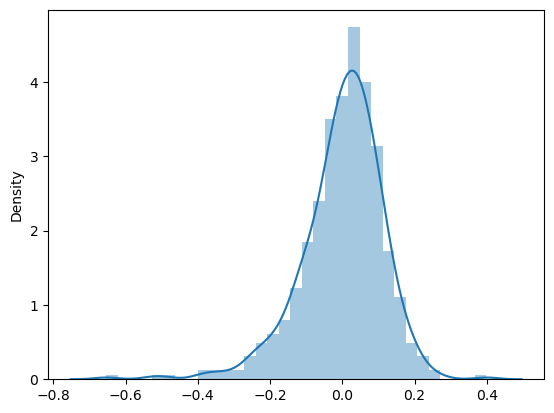

In [837]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

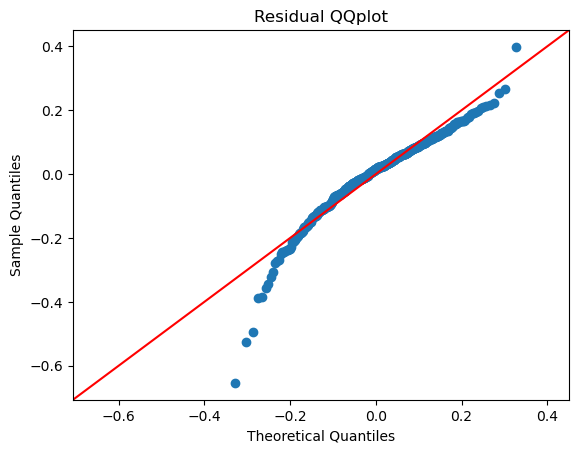

In [838]:
# plotting the Q-Q plot of residual against normal distribution
std_dev = res.std()
fig = sm.qqplot(res, line='45', loc=0, scale=std_dev)
plt.title('Residual QQplot')
plt.savefig('Residual_QQplot')
plt.show()

In [839]:
numVars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# fit on data
newDay_test[numVars] = scaler.transform(newDay_test[numVars])

newDay_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [840]:
newDay_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.318182,0.654545,0.254545,0.263636,0.236364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.466833,0.476601,0.436599,0.441609,0.425817,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [841]:
y_test = newDay_test.pop('cnt')
X_test = newDay_test

In [842]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Mist,clear,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [843]:
X_test_sm = X_test_sm.drop(['Mar', 'Oct', 'June', 'Sat', 'atemp', 'Tues', 'Sun',
                            'Aug', 'Thurs', 'Wed', 'May', 'Feb', 'holiday', 'hum', 'clear', 'temp'], axis=1)



In [844]:
X_test_sm.head()

,const,yr,workingday,windspeed,Mist,spring,summer,winter,Mon,Dec,Jan,July,Nov,Sep
184,1.0,0,0,0.084219,1,0,0,0,0,0,0,1,0,0
535,1.0,1,1,0.153728,0,0,1,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,1,0,0,1,0,0,0,0,0,0
221,1.0,0,1,0.339570,0,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,0,1,0,0,0,0,0,0,0


In [845]:
# prediction

y_test_pred = lr_model.predict(X_test_sm)

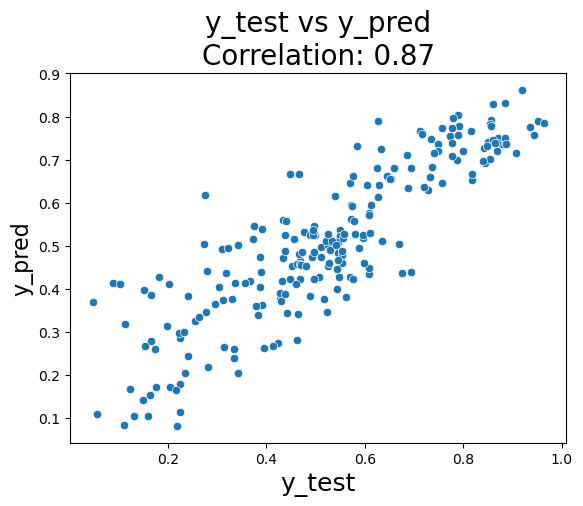

In [846]:
#plotting y_test and y_test_pred
corr = round(np.corrcoef(y_test, y_test_pred)[0][1],2)
sns.scatterplot(x = y_test, y = y_test_pred)
plt.title('y_test vs y_pred' + '\nCorrelation: ' + str(corr), fontsize=20)#Plot heading
plt.xlabel('y_test', fontsize=18)# X-label
plt.ylabel('y_pred', fontsize=16)# Y-label
plt.show()

In [847]:
# evaluate the model using r-score

from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.7529317649011296

The R-squared score on predicted data from test dataset is 0.75

#### Regression Equation:

  cnt = 0.2525 * yr + 0.0473 * workingday - 0.2241 * windspeed - 0.0739 * Mist - 0.2501 * spring - 0.0472 * winter + 0.0567 * Mon - 0.0974 * Dec - 0.1163 * Jan - 0.0164 * July - 0.0883 * Nov + 0.0427 * Sep
 
#### Positive Impact:

 - Year (yr): 0.2525
   - The year has a positive influence on bike demand.
 - Working Day: 0.0473
   - Working days also contribute positively to demand.
 - Monday (Mon): 0.0567
   - Mondays seem to indicate higher demand.
 
#### Negative Impact:

 - Windspeed: -0.2241
   - Higher windspeed is associated with reduced demand.
 - Mist: -0.0739
   - Misty weather negatively affects demand.
 - Seasonal Factors:
   - Spring: -0.2501
      - Spring and other seasonal variables (winter, Dec, Jan, July, Nov, Sep) show negative impacts on demand.
      
#### Key Features Impacting Demand:

Based on the magnitude of coefficients, the top three features significantly contributing to explaining demand are spring, yr, and windspeed. These variables play a crucial role in determining bike demand.

#### Recommendation:

Considering the model's insights, it's recommended to prioritize strategies focusing on the following variables to potentially enhance bike demand:

 1. Spring
 2. Year (yr)
 3. Windspeed
 
Optimizing promotional activities or operational adjustments concerning these influential factors could help in maximizing bike demand.
